In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
stu_all = pd.read_excel('Study3.xlsx',sheet_name=2,header=1).dropna()

# Clean the empty value
stu = stu_all[stu_all.At_video != 0.0]

tutorials = stu[(stu['Aspect'] <=4.0)]
tut_info = tutorials[['Video','Aspect','Text']]

examples = stu[(stu['Aspect'] >= 5.0)]
exp_info = examples[['Video','Aspect','Text']]



In [3]:
x=['Tutorial1','Tutorial2','Tutorial3','Tutorial4']

tutorial1_single= tut_info[tut_info.Video == 'Tutorial1']
tutorial1_single['Aspect'].value_counts()
y1 = np.array([8, 18, 23, 89])

tutorial2_single= tut_info[tut_info.Video == 'Tutorial2']
tutorial2_single['Aspect'].value_counts()
y2 = np.array([4, 24, 32, 75])

tutorial3_single= tut_info[tut_info.Video == 'Tutorial3']
tutorial3_single['Aspect'].value_counts()
y3 = np.array([6, 22, 25, 117])

tutorial4_single= tut_info[tut_info.Video == 'Tutorial4']
tutorial4_single['Aspect'].value_counts()
y4 = np.array([10, 38, 39, 57])


In [4]:
v1 = [y1.sum(),y2.sum(),y3.sum(),y4.sum()]
v2 = [y1.sum()-y1[3], y2.sum()-y2[3], y3.sum()-y3[3], y4.sum()-y4[3]]
v3 = [y1.sum()-y1[3]-y1[2], y2.sum()-y2[3]-y2[2], y3.sum()-y3[3]-y3[2], y4.sum()-y4[3]-y4[2]]
v4 = [8,5,7,14]

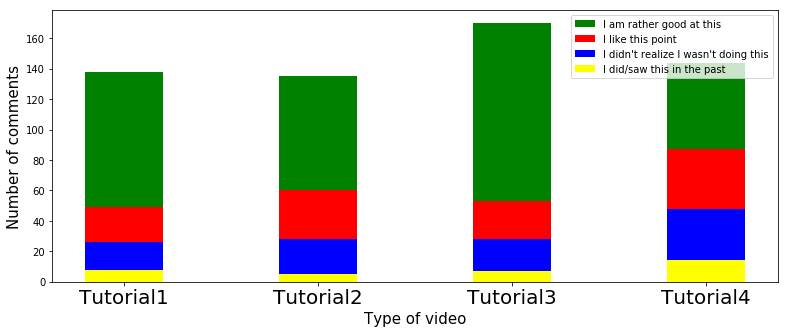

In [5]:
plt.figure(figsize=(13,5))

plt.bar(x,v1,color="green",width=0.4)
plt.bar(x,v2,color="red",width=0.4)
plt.bar(x,v3,color="blue",width=0.4)
plt.bar(x,v4,color="yellow",width=0.4)

plt.xticks(fontsize=20)
plt.xlabel('Type of video', fontsize=15)
plt.ylabel('Number of comments', fontsize=15)

plt.legend(["I am rather good at this","I like this point","I didn't realize I wasn't doing this", "I did/saw this in the past"],loc='best')  #设置图例

plt.show()

## Tutorial 3 implementation

In [6]:
tut3 = tutorials[['Username','Video','Aspect','At_video']]
tut3 = tut3[tut3.Video =='Tutorial3']
t4 = tut3.sort_values(by='At_video')
t4 = t4[t4.Aspect == 4.0]

t4['Username'].value_counts()
name = ['mfu36','jan110','mbw49','bep29','mba168','lfu24','tco50','cwa134','tss43','olt15']

m = t4[(t4['Username'] == 'mfu36')]
j = t4[(t4['Username'] == 'jan110')]
mbw = t4[(t4['Username'] == 'mbw49')]
b = t4[(t4['Username'] == 'bep29')]
mba = t4[(t4['Username'] == 'mba168')]
l = t4[(t4['Username'] == 'lfu24')]
t = t4[(t4['Username'] == 'tco50')]
c = t4[(t4['Username'] == 'cwa134')]
tss = t4[(t4['Username'] == 'tss43')]
o = t4[(t4['Username'] == 'olt15')]


In [7]:
frames = [m,j,mbw,b,mba,l,t,c,tss,o]
result = pd.concat(frames)
result = result.sort_values(by='At_video')
result = result.sort_values(by='Username')

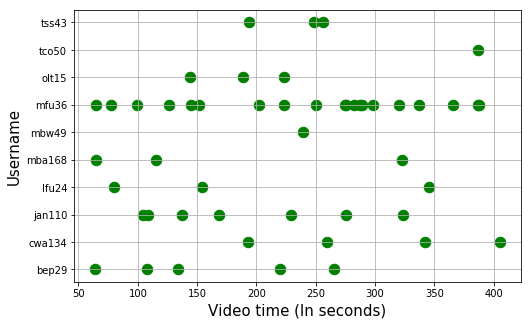

In [8]:
###  散点图制作
plt.figure(figsize=(8,5))
x = result['At_video'].values.tolist()
y = result['Username'].values.tolist()
plt.yticks(fontsize=10)
plt.ylabel('Username',fontsize=15)
plt.xlabel('Video time (In seconds)',fontsize=15)

plt.grid()

plt.scatter(x, y, c='Green',s=110)
plt.show()